<hr>
<br><br>
    <h1 align=center><font size = 5>Exercício prático - Semana 2 (Quarta)
    <br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Análise das motos vendidas na India</font></h1>
<br><br>

#### Perguntas que iremos responder

- Qual o significado das variáveis do dataram?

- Quais os tipos de variáveis você tem?

- A base tem dados nulos?

- O tipo das variáveis está certo?

- Qual a moto mais cara? A moto mais cara é elétrica?

- Qual moto é mais barata? Quais suas caracteristicas?

- A maioria das motos da base de dados são elétricas ou a gasolina? Qual o percentual de motos a gasolina?

- As motos são leves ou pesadas? A maioria das motos estão centradas em qual kg?

- Há diferença de peso entre as motos do tipo elétrica e à gasolina?

- Qual moto é a mais pesada?


- Qual a tendencia da velocidade máxima das motos? Tem diferença entre as motos do tipo elétrica e à gasolina?

- Qual moto tem a maior velocidade máxima?

- Qual a tendência da quilometragem das motos? Tem diferença entre as motos do tipo elétrica e à gasolina?


- Há diferença de preços entre motos elétricas e movidas a gasolina?

- A velocidade máxima alcançada pela moto tem influência no preço?

- O peso tem influência no preço?

- O tipo da moto tem influência no preço?



## 1. Preparação do ambiente <a id="1"></a>


<h4>1.1 Importação de bibliotecas:</h4><a id="11"></a>


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4>1.2 Leitura de dados:</h4> <a id="12"></a>

In [12]:
df = pd.read_csv('bike_dataset.csv')
df.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


<h4>1.3  Identificação de valores faltantes</h4> <a id="12"></a>

In [13]:
faltantes = pd.DataFrame({'colunas':df.columns, 
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      '% valores NaN':df.isna().sum()/df.shape[0],
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
0,model_name,model_name,object,0,0.000000,361
1,price,price,int64,0,0.000000,344
2,CC,CC,float64,57,0.157895,129
3,mileage,mileage,float64,0,0.000000,110
4,type_of_bike,type_of_bike,object,0,0.000000,2
5,weight_in_kg,weight_in_kg,int64,0,0.000000,183
6,links,links,object,0,0.000000,361
7,acceleration_speed,acceleration_speed,float64,191,0.529086,70
8,top_speed,top_speed,float64,161,0.445983,66


Temos variáveis do tipo Object(Strings), float (valores contínuos), int (valores inteiros)

A coluna 'acceleration_speed' está com 52% dos dados faltantes, já 'top_speed' está com 44% dos dados faltantes.
Se excluirmos esses dados iremos perder muita informação, portanto vamos fazer um tratamento nesses dados

Como essas variáveis são do tipo float iremos preencher os valores faltantes com a média dos valores

<h4>1.4  Tratando valores faltantes</h4> <a id="12"></a>

In [14]:
mean_value = df['acceleration_speed'].mean()
df['acceleration_speed'].fillna(value=mean_value, inplace=True)


In [15]:
mean_value = df['top_speed'].mean()
df['top_speed'].fillna(value=mean_value, inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  304 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  361 non-null    float64
 8   top_speed           361 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.5+ KB


Todos os valores nulos foram tratados

## 2. Análise descritiva e diagnóstica <a id="2"></a>

- Qual a moto mais cara? A moto mais cara é elétrica?

- Qual moto é mais barata? Quais suas caracteristicas?

- A maioria das motos da base de dados são elétricas ou a gasolina? Qual o percentual de motos a gasolina?

- As motos são leves ou pesadas? A maioria das motos estão centradas em qual kg?

- Há diferença de peso entre as motos do tipo elétrica e à gasolina?

- Qual moto é a mais pesada?


- Qual a tendencia da velocidade máxima das motos? Tem diferença entre as motos do tipo elétrica e à gasolina?

- Qual moto tem a maior velocidade máxima?

- Qual a tendência da quilometragem das motos? Tem diferença entre as motos do tipo elétrica e à gasolina?


- Há diferença de preços entre motos elétricas e movidas a gasolina?

- A velocidade máxima alcançada pela moto tem influência no preço?

- O peso tem influência no preço?

- O tipo da moto tem influência no preço?



/Users/lauradamaceno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type_of_bike', ylabel='count'>

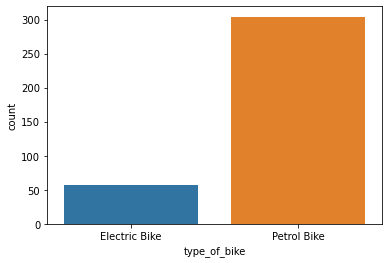

In [17]:
sns.countplot(df.type_of_bike)

A maioria das motos são movidas a gasolina

In [18]:
df.type_of_bike.value_counts()

Petrol Bike      304
Electric Bike     57
Name: type_of_bike, dtype: int64

In [23]:
total_de_motos = df.shape[0]

In [22]:
total_de_motos_eletricas = df.type_of_bike.value_counts()[1]

In [24]:
total_de_motos_gasolina = df.type_of_bike.value_counts()[0]

In [26]:
percentual_eletricas = (total_de_motos_eletricas*100)/total_de_motos
percentual_gasolina = (total_de_motos_gasolina*100)/total_de_motos

In [27]:
print(f"Porcentagem de motos elétricas é: {percentual_eletricas}")

Porcentagem de motos elétricas é: 15.789473684210526


In [28]:
print(f"Porcentagem de motos a gasolina é: {percentual_gasolina}")

Porcentagem de motos a gasolina é: 84.21052631578948


<AxesSubplot:xlabel='weight_in_kg', ylabel='Count'>

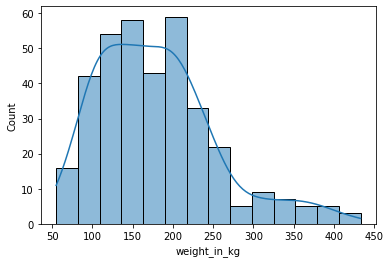

In [29]:
sns.histplot(data = df.weight_in_kg, kde=True)


A maiora das motos tem peso entre 100 e 200 kg. Dando a entender que as motos costumam ser leves

<AxesSubplot:xlabel='weight_in_kg', ylabel='Count'>

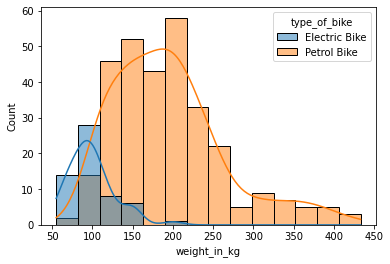

In [35]:
sns.histplot(data = df,x ='weight_in_kg',kde=True,hue='type_of_bike')


Podemos perceber que há diferença entre os pesos das motos, quando elas são movidas a gasolina costumam ser mais pesadas. O peso fica centrado entre 100 até 200 kg.



Já motos do tipo elétricas são bem mais leves, pesando entre 50 e 100 kg.

In [31]:
df.sort_values(by='price',ascending=False)

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
339,Kawasaki Ninja H2R,7990000,998.0,15.0,Petrol Bike,216,https://www.carandbike.com/kawasaki-bikes/ninj...,4.193412,99.33865
338,Ducati 1299 Panigale,5182000,1285.0,15.0,Petrol Bike,190,https://www.carandbike.com/ducati-bikes/1299-p...,4.193412,99.33865
360,Harley-Davidson CVO Limited,4999000,1923.0,8.0,Petrol Bike,411,https://www.carandbike.com/harley-davidson-bik...,4.193412,99.33865
337,Indian Roadmaster Elite,4800000,1811.0,15.0,Petrol Bike,433,https://www.carandbike.com/indian-bikes/roadma...,4.193412,99.33865
310,BMW M 1000 RR,4200000,999.0,15.4,Petrol Bike,192,https://www.carandbike.com/bmw-bikes/m-1000-rr,4.193412,99.33865
...,...,...,...,...,...,...,...,...,...
34,Bajaj CT 100,40794,102.0,89.5,Petrol Bike,114,https://www.carandbike.com/bajaj-bikes/ct-100,3.300000,90.00000
45,Polarity Sport,40000,NaN,80.0,Electric Bike,55,https://www.carandbike.com/polarity-bikes/sport,4.193412,45.00000
87,Evolet Pony,39499,NaN,55.0,Electric Bike,82,https://www.carandbike.com/evolet-bikes/pony,4.193412,25.00000
108,Ampere V48,38719,NaN,45.0,Electric Bike,84,https://www.carandbike.com/ampere-bikes/v48,4.193412,25.00000


A moto mais cara é a Kawasaki Ninja H2R com valor de 7990000, movida a gasolina com kilometragem de 15, velocidade máxima de 99.33 e aceleração de 4.19




In [36]:
df.sort_values(by='price',ascending=False)[:10]

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
339,Kawasaki Ninja H2R,7990000,998.0,15.0,Petrol Bike,216,https://www.carandbike.com/kawasaki-bikes/ninj...,4.193412,99.33865
338,Ducati 1299 Panigale,5182000,1285.0,15.0,Petrol Bike,190,https://www.carandbike.com/ducati-bikes/1299-p...,4.193412,99.33865
360,Harley-Davidson CVO Limited,4999000,1923.0,8.0,Petrol Bike,411,https://www.carandbike.com/harley-davidson-bik...,4.193412,99.33865
337,Indian Roadmaster Elite,4800000,1811.0,15.0,Petrol Bike,433,https://www.carandbike.com/indian-bikes/roadma...,4.193412,99.33865
310,BMW M 1000 RR,4200000,999.0,15.4,Petrol Bike,192,https://www.carandbike.com/bmw-bikes/m-1000-rr,4.193412,99.33865
351,Honda Gold Wing,3971822,1833.0,14.0,Petrol Bike,390,https://www.carandbike.com/honda-bikes/gold-wing,4.193412,99.33865
336,Indian Roadmaster,3900000,1811.0,15.0,Petrol Bike,421,https://www.carandbike.com/indian-bikes/roadma...,4.193412,99.33865
335,MV Agusta F4 RR,3883000,998.0,15.0,Petrol Bike,190,https://www.carandbike.com/mv-agusta-bikes/f4-rr,4.193412,99.33865
299,Indian Chieftain Elite,3800000,1811.0,18.0,Petrol Bike,388,https://www.carandbike.com/indian-bikes/chieft...,4.193412,99.33865
334,Kawasaki Ninja H2,3499000,998.0,15.0,Petrol Bike,238,https://www.carandbike.com/kawasaki-bikes/ninj...,4.193412,99.33865


Olhando para o top 10 das motos mais caras a maioria é movida a gasolina. Há correlação entre esses pontos?

In [37]:
df.sort_values(by='price',ascending=True)[:10]

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
44,Polarity Executive,38000,NaN,80.0,Electric Bike,55,https://www.carandbike.com/polarity-bikes/exec...,4.193412,40.0
108,Ampere V48,38719,NaN,45.0,Electric Bike,84,https://www.carandbike.com/ampere-bikes/v48,4.193412,25.0
87,Evolet Pony,39499,NaN,55.0,Electric Bike,82,https://www.carandbike.com/evolet-bikes/pony,4.193412,25.0
45,Polarity Sport,40000,NaN,80.0,Electric Bike,55,https://www.carandbike.com/polarity-bikes/sport,4.193412,45.0
34,Bajaj CT 100,40794,102.0,89.5,Petrol Bike,114,https://www.carandbike.com/bajaj-bikes/ct-100,3.300000,90.0
80,Lohia Omastar,40850,NaN,60.0,Electric Bike,66,https://www.carandbike.com/lohia-bikes/omastar,4.193412,25.0
64,TVS XL 100,40990,99.7,67.0,Petrol Bike,88,https://www.carandbike.com/tvs-bikes/xl-100,13.000000,60.0
88,Evolet Polo,44499,NaN,55.0,Electric Bike,82,https://www.carandbike.com/evolet-bikes/polo,4.193412,25.0
109,Ampere Reo,44838,NaN,45.0,Electric Bike,70,https://www.carandbike.com/ampere-bikes/reo,4.193412,25.0
41,Bounce Infinity E1,45099,NaN,83.0,Electric Bike,94,https://www.carandbike.com/bounce-bikes/infini...,8.000000,65.0


A moto mais barata é a Polarity Executive com preço de 38000, kilometragem de 80, peso de 55 kg, do tipo elétrica com velocidade máxima de 40, e aceleração de 4.19

Olhando para a lista de motos mais baratas podemos perceber que a velocidade máxima é bem baixa, alcançando no máximo 90. Há uma correlação?

E a maioria delas é do tipo elétrica

In [40]:
df.sort_values(by='weight_in_kg',ascending=False)[:10]

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
337,Indian Roadmaster Elite,4800000,1811.0,15.0,Petrol Bike,433,https://www.carandbike.com/indian-bikes/roadma...,4.193412,99.33865
336,Indian Roadmaster,3900000,1811.0,15.0,Petrol Bike,421,https://www.carandbike.com/indian-bikes/roadma...,4.193412,99.33865
360,Harley-Davidson CVO Limited,4999000,1923.0,8.0,Petrol Bike,411,https://www.carandbike.com/harley-davidson-bik...,4.193412,99.33865
350,Indian Springfield,3350000,1811.0,14.0,Petrol Bike,391,https://www.carandbike.com/indian-bikes/spring...,4.193412,99.33865
351,Honda Gold Wing,3971822,1833.0,14.0,Petrol Bike,390,https://www.carandbike.com/honda-bikes/gold-wing,4.193412,99.33865
270,Indian Chieftain,3201000,1811.0,20.0,Petrol Bike,389,https://www.carandbike.com/indian-bikes/chieftain,4.193412,99.33865
299,Indian Chieftain Elite,3800000,1811.0,18.0,Petrol Bike,388,https://www.carandbike.com/indian-bikes/chieft...,4.193412,99.33865
269,Indian Chief Vintage,2532500,1811.0,20.0,Petrol Bike,379,https://www.carandbike.com/indian-bikes/chief-...,4.193412,99.33865
298,Indian Chieftain Dark Horse,2999000,1811.0,18.0,Petrol Bike,377,https://www.carandbike.com/indian-bikes/chieft...,4.193412,99.33865
333,Harley-Davidson Road Glide Special,3299000,1745.0,15.0,Petrol Bike,372,https://www.carandbike.com/harley-davidson-bik...,4.193412,99.33865


A moto mais pesada é a Indian Roadmaster Elite, com peso de 433 kg

Na lista top 10 das motos mais pesadas podemos perceber que a maioria é movida a gasolina, e a velocidade máxima é bem alta.

<AxesSubplot:xlabel='top_speed', ylabel='Count'>

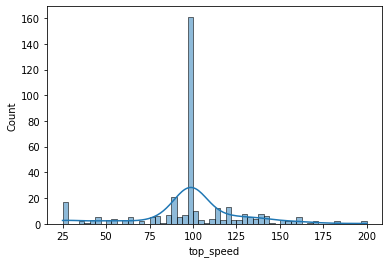

In [41]:
sns.histplot(data = df.top_speed, kde=True)


A maioria das velocidades máximas estão centradas em 100

<AxesSubplot:xlabel='top_speed', ylabel='Count'>

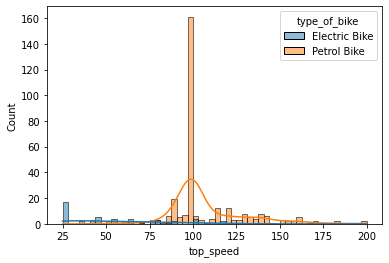

In [43]:
sns.histplot(data = df,x ='top_speed',kde=True,hue='type_of_bike')


Podemos perceber no gráfico que as motos do tipo elétricas costumam ter velocidade máxima abaixo de 100, confirmando nossa hipótese levantada acima. Já as motos movids a gasolina são bem mais rápidas

In [44]:
df.sort_values(by='top_speed',ascending=False)[:10]

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
170,KTM RC 390,314000,373.2,35.00,Petrol Bike,147,https://www.carandbike.com/ktm-bikes/rc-390,2.24,200.0
195,Kawasaki Z250,308000,249.0,26.00,Petrol Bike,168,https://www.carandbike.com/kawasaki-bikes/z250,1.01,200.0
196,Kawasaki Ninja 300,337000,296.0,26.00,Petrol Bike,179,https://www.carandbike.com/kawasaki-bikes/ninj...,2.01,182.0
190,Honda CB500X,687386,471.0,28.60,Petrol Bike,199,https://www.carandbike.com/honda-bikes/cb500x,1.70,182.0
198,Royal Enfield Interceptor 650,281518,648.0,25.50,Petrol Bike,202,https://www.carandbike.com/royal-enfield-bikes...,1.90,170.0
165,KTM RC 200,213000,199.5,35.00,Petrol Bike,151,https://www.carandbike.com/ktm-bikes/rc-200,1.98,170.0
169,KTM 390 Duke,287545,373.2,35.00,Petrol Bike,167,https://www.carandbike.com/ktm-bikes/390-duke,2.19,167.0
199,Royal Enfield Continental GT 650,298079,648.0,25.50,Petrol Bike,198,https://www.carandbike.com/royal-enfield-bikes...,1.79,161.0
177,Benelli TRK 502,486000,500.0,30.97,Petrol Bike,235,https://www.carandbike.com/benelli-bikes/trk-502,2.00,160.0
188,TVS Apache RR 310,259000,312.2,30.00,Petrol Bike,170,https://www.carandbike.com/tvs-bikes/apache-rr...,2.00,160.0


A moto com maior velocidade máxima é a KTM RC 390, alcançando 200

<AxesSubplot:xlabel='mileage', ylabel='Count'>

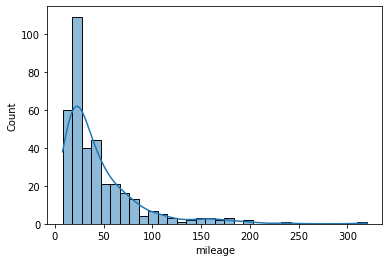

In [45]:
sns.histplot(data = df.mileage, kde=True)


A maioria das kilometragens das motos estão centradas entre 0 e 50.

<AxesSubplot:xlabel='mileage', ylabel='Count'>

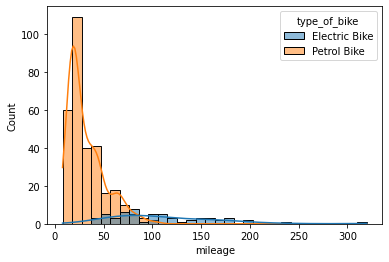

In [50]:
sns.histplot(data = df,x ='mileage',kde=True,hue='type_of_bike')


Pode-se perceber que há difereça de quilometragem entre os tipos de motos. Sendo que as movidas a gasolina tem quilometragem abaixo de 50. Já as elétricas estão bem mais disperças os valores.

<AxesSubplot:xlabel='price', ylabel='Count'>

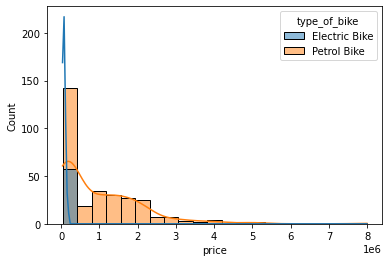

In [51]:
sns.histplot(data = df,x ='price',kde=True,hue='type_of_bike')


<AxesSubplot:xlabel='price', ylabel='type_of_bike'>

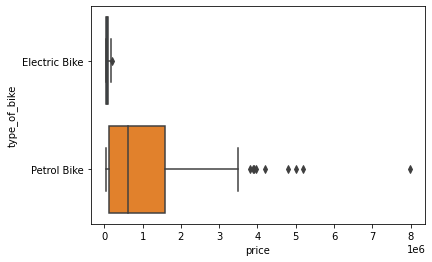

In [52]:
sns.boxplot(data=df, x="price", y="type_of_bike")



Podemos perceber que há diferença de preços entre as motos elétricas e as de gasolina. Sendo essa ultima a que tende a ter os valores mais caros. Além disso podemos perceber a presença de outliers na variável preço

In [53]:
df.columns

Index(['model_name', 'price', 'CC', 'mileage', 'type_of_bike', 'weight_in_kg',
       'links', 'acceleration_speed', 'top_speed'],
      dtype='object')

Text(0.5, 1.05, 'Disperção entre as variaveis')

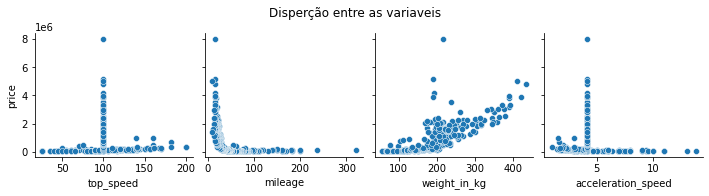

In [54]:
ax = sns.pairplot(df,y_vars='price',x_vars=['top_speed','mileage','weight_in_kg','acceleration_speed'])
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

Podemos perceber que as motos mais pesadas costumam ter um aumento no valor do preço final

Já nas outras variáveis fica mais dificil de encontrar essa relação. Levantando o ponto que o tipo de moto tem influencia no comportamento dessa variável portanto devem ser analisadas separadamente

In [56]:
df.type_of_bike.unique()

array(['Electric Bike', 'Petrol Bike'], dtype=object)

In [57]:
df_gasolina = df[df.type_of_bike == 'Petrol Bike']
df_eletrica = df[df.type_of_bike == 'Electric Bike']

Text(0.5, 1.05, 'Disperção entre as variaveis')

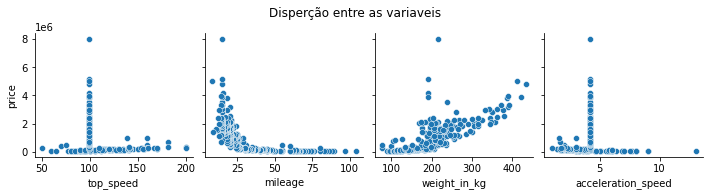

In [58]:
ax = sns.pairplot(df_gasolina,y_vars='price',x_vars=['top_speed','mileage','weight_in_kg','acceleration_speed'])
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

Para as motos movidas a gasolina está mais dificil de indentificar as variáveis que impactam no preço da moto, tirando a variável peso.



Um ponto que podemos observar é que motos com quilometragem abaixo de 25 tendem a ter um aumento no preço. Já motos com alta quilometragem costuma ser mais baratas.

Text(0.5, 1.05, 'Disperção entre as variaveis')

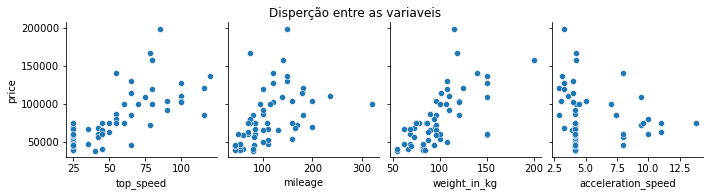

In [59]:
ax = sns.pairplot(df_eletrica,y_vars='price',x_vars=['top_speed','mileage','weight_in_kg','acceleration_speed'])
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

Nas bikes elétricas pode-se perceber que conforme aumenta a velocidade máxima maior é o preço da moto.
Para a quilometragem para carga completa podemos tirar o mesmo insight, conforme aumenta a quilometragem maior tende a ser o preço final

O mesmo insight se aplica ao peso da moto elétrica

<div style="text-align:right;">
Laura Damacenode Almeida
    <br>
